# Color images

![pandas](https://images.unsplash.com/photo-1649073586428-e288125d930a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1332&q=80)


photo by [julien Tromeur](https://unsplash.com/@julientromeur) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about introduction to medical images in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rescale
from skimage import  color
import scipy.ndimage as ndi

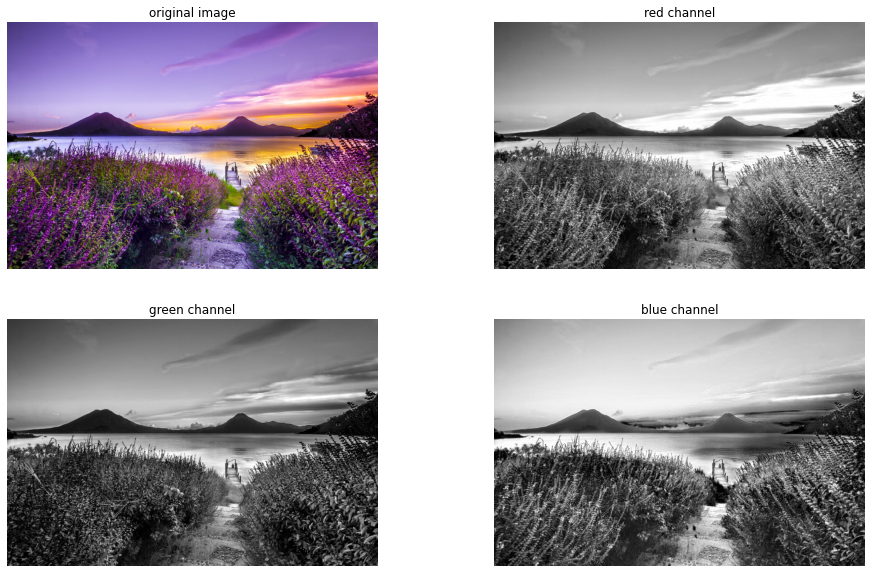

In [ ]:
url = "https://images.unsplash.com/photo-1532274402911-5a369e4c4bb5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"


im = io.imread(url)
#slicing channels
im1 = im[:,:,0]
im2 = im[:,:,1]
im3 = im[:,:,2]

fig, axes = plt.subplots(2,2,  sharex=True, sharey=True,
                         figsize=(16,10))
axes = axes.ravel()
axes[0].imshow(im)
axes[0].set_title('original image')

axes[1].imshow(im1, cmap=plt.cm.gray)
axes[1].set_title('red channel')

axes[2].imshow(im2, cmap=plt.cm.gray)
axes[2].set_title('green channel')

axes[3].imshow(im3, cmap=plt.cm.gray)
axes[3].set_title('blue channel')

for ax in axes:
    ax.axis('off')

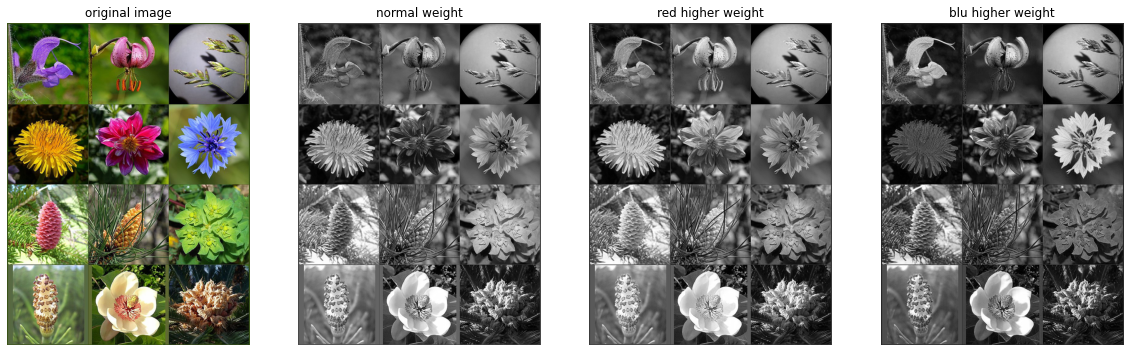

In [ ]:

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Bl%C3%BCten_1.jpg/800px-Bl%C3%BCten_1.jpg"
im = io.imread(url)
im1 = (0.2125 * im[:, :, 0]) + (0.7154 * im[:, :, 1]) + (0.0721* im[:, :, 2])
im2 = (0.7 * im[:, :, 0]) + (0.2 * im[:, :, 1]) + (0.1* im[:, :, 2])
im3 = (0.2 * im[:, :, 0]) + (0.2 * im[:, :, 1]) + (0.7* im[:, :, 2])

fig, axes = plt.subplots(ncols=4,  sharex=True, sharey=True,
                         figsize=(20,8))

axes[0].imshow(im)
axes[0].set_title('original image')

axes[1].imshow(im1, cmap=plt.cm.gray)
axes[1].set_title('normal weight')

axes[2].imshow(im2, cmap=plt.cm.gray)
axes[2].set_title('red higher weight')

axes[3].imshow(im3, cmap=plt.cm.gray)
axes[3].set_title('blu higher weight')

for ax in axes:
    ax.axis('off')

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter
import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
def extract_colors(image, n_colors, resize = 0.5):
    """
    count colors in an image
    """
    def RGB2HEX(color):
      "RGB color to HEX colors"
      return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

    #scaling if too big
    if resize is not None:
      "note: in the next version  multichannel argument is changed"
      image = rescale(image, resize, anti_aliasing = True, multichannel= True)
      image = image *255

    image = image.reshape(image.shape[0]*image.shape[1], 3)
    #clustering step
    clf = KMeans(n_clusters = n_colors)
    labels = clf.fit_predict(image)
    #counting step
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    #obtaining HEX colors
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    #save in a pdf
    df = pd.DataFrame(columns= ["colors", "value_count"])
    df["colors"], df["value_count"] = hex_colors, counts.values()
    return df

url = "https://images.unsplash.com/photo-1532274402911-5a369e4c4bb5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80"

image = io.imread(url)


df =extract_colors(image, 8, resize =0.5)
df


,colors,value_count
0,#625a2e,9314
1,#a890d6,20390
2,#df976c,7593
3,#8668b6,22500
4,#d9bfe1,13721
5,#1f1624,18604
6,#774978,15566
7,#452b4a,18462


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

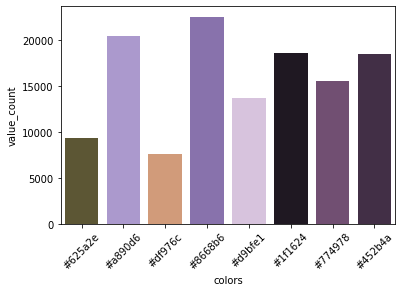

In [ ]:
ax = sns.barplot(x="colors", y="value_count", data=df, palette = df["colors"])
plt.xticks(rotation = 45)

In [ ]:
url = "https://images.unsplash.com/photo-1568801556940-e5b3a55fa6ea?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=464&q=80"
im1 = io.imread(url)
df1 =extract_colors(im1, 8, resize =0.5)
url = "https://images.unsplash.com/photo-1493329025335-18542a61595f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80"
im2 = io.imread(url)
df2 =extract_colors(im2, 8, resize =0.5)

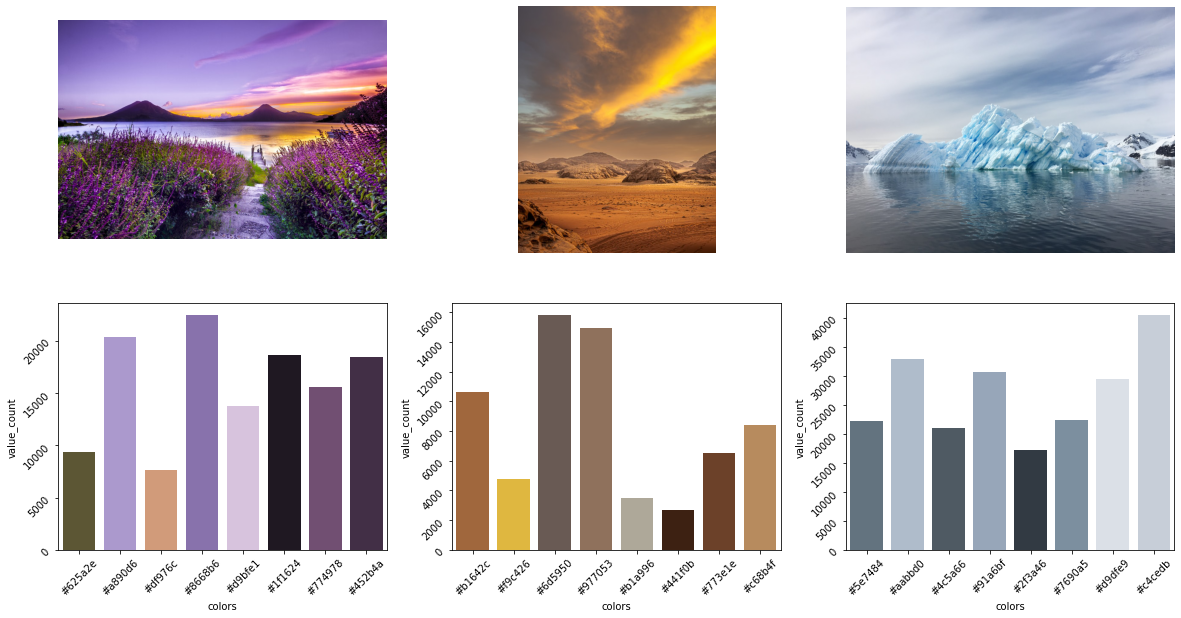

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
axes = axes.ravel()
axes[0].imshow(image)

axes[1].imshow(im1)
axes[2].imshow(im2)

ax = sns.barplot(x="colors", y="value_count", data=df, palette = df["colors"], ax= axes[3])
axes[3].tick_params(labelrotation=45)

ax = sns.barplot(x="colors", y="value_count", data=df1, palette = df1["colors"], ax= axes[4])
axes[4].tick_params(labelrotation=45)

ax = sns.barplot(x="colors", y="value_count", data=df2, palette = df2["colors"], ax= axes[5])
axes[5].tick_params(labelrotation=45)

for ax in axes[:3]:
    ax.axis('off')


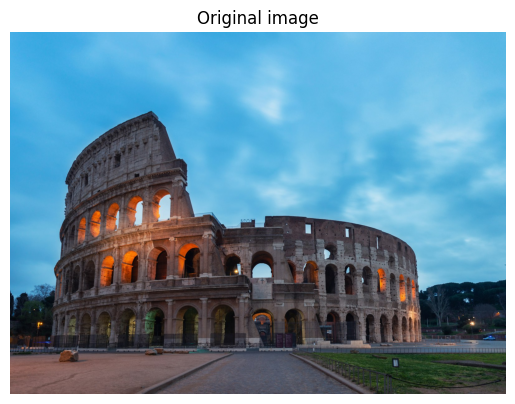

In [20]:
# Image segmentation
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
url='https://images.unsplash.com/photo-1552832230-c0197dd311b5?q=80&w=1592&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
img = io.imread(url)
plt.axis('off')
plt.imshow(img)
plt.title('Original image')
plt.show()

In [25]:
# Inspired by https://www.kaggle.com/code/amulyamanne/image-segmentation-color-clustering

def segment_image_kmeans(im = None, K =3):
  '''
  segment an image with k-means
  '''
  # converting to HSV space
  img_hsv=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  vectorized = np.float32(img_hsv.reshape((-1,3)))
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
  K = 3
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img_hsv.shape))
  return img_hsv, result_image


k=3
img_hsv, result_image = segment_image_kmeans(im = img, K =K)

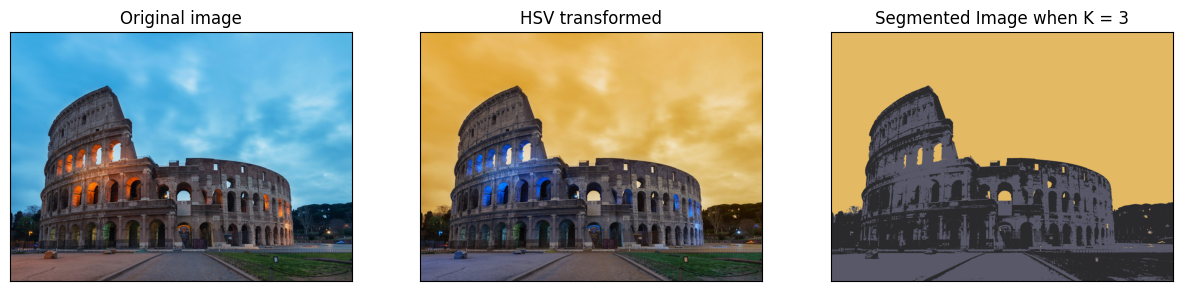

In [28]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,3,1),plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(img_hsv)
plt.title('HSV transformed'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])

plt.show()